In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ
from ceq import ceQ
from training import *

### Q-Learning

In [2]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q = learning(learner_q, env, epsilon_decay=0.99999, alpha_decay=0.99999, max_iteration=1000000)

100%|██████████| 1000000/1000000 [01:19<00:00, 12632.27it/s]


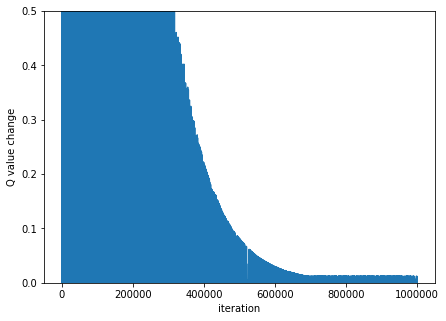

In [3]:
plot_error(hist_q, "figures/Q.png")

### Friend-Q

In [4]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ = learning(learner_friendQ, env, epsilon_decay=1, alpha_decay=0.99999, max_iteration=1000000)

100%|██████████| 1000000/1000000 [00:48<00:00, 20693.84it/s]


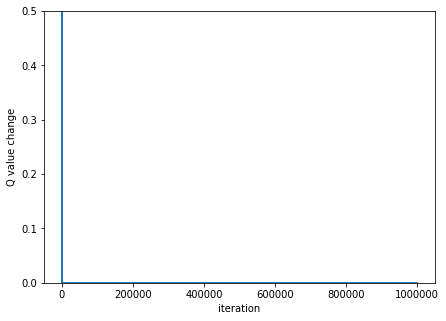

In [5]:
plot_error(hist_friendQ, "figures/friendQ.png")

In [6]:
# Q table for state 71
show_table(learner_friendQ.agents[0].Q[71])
show_table(learner_friendQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,9.0,10.0,8.526,9.0,9.0
W,9.0,10.0,8.758,9.0,9.0
E,9.0,10.0,-0.824,9.0,9.0
N,9.0,10.0,8.526,9.0,9.0
S,9.0,10.0,8.100,9.0,9.0


player B,stick,W,E,N,S
player A,,,,,
stick,8.532,-10.0,9.000,8.532,8.100
W,8.532,-10.0,8.771,8.532,8.100
E,8.100,-10.0,9.493,8.100,8.100
N,8.532,-10.0,9.000,8.532,8.100
S,8.100,-10.0,9.000,8.100,8.532


In [7]:
# Player 2's action
learner_friendQ.agents[1].select_action(71)

2

### Foe-Q

In [8]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)

hist_foeQ = learning(learner_foeQ, env, epsilon_decay=1, alpha_decay=0.99999, max_iteration=1000000)

100%|██████████| 1000000/1000000 [09:17<00:00, 1795.32it/s]


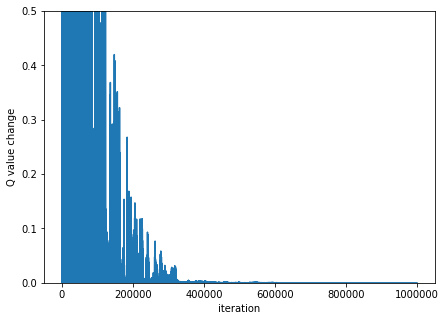

In [9]:
plot_error(hist_foeQ, "figures/foeQ.png")

In [10]:
# Q value for state(71)
show_table(learner_foeQ.agent1.Q[71])
show_table(learner_foeQ.agent2.Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-2.228,-2.228,-2.580,-2.228,-2.755
W,10.000,10.000,10.000,10.000,10.000
E,2.521,0.202,-9.128,2.521,-2.874
N,-2.228,-2.228,-2.579,-2.228,-2.756
S,-2.689,-5.371,-7.422,-2.688,-2.247


player B,stick,W,E,N,S
player A,,,,,
stick,2.228,-10.0,-2.521,2.228,2.689
W,2.228,-10.0,-0.202,2.228,5.371
E,2.580,-10.0,9.128,2.579,7.422
N,2.228,-10.0,-2.521,2.228,2.688
S,2.755,-10.0,2.874,2.756,2.247


In [11]:
# Policy -- probablity distribution
# stick left right up down
learner_foeQ.agent1.p[71].round(3),  learner_foeQ.agent2.p[71].round(3)

(array([0.   , 0.   , 0.   , 0.525, 0.475]),
 array([0.   , 0.   , 0.   , 0.455, 0.545]))

### Correlated Q

In [12]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ = learning(learner_ceQ, env, epsilon_decay=1, alpha_decay=0.99999, max_iteration=1000000)

100%|██████████| 1000000/1000000 [1:26:31<00:00, 192.63it/s]


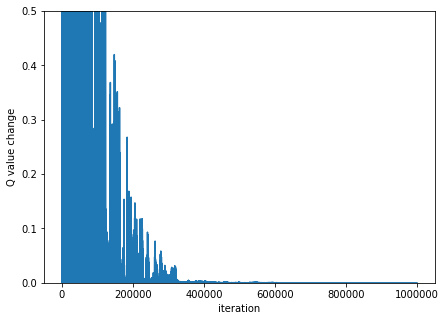

In [13]:
plot_error(hist_ceQ, "figures/ceQ.png")

In [14]:
# Q value for state(71)
show_table(learner_ceQ.agents[0].Q[71])
show_table(learner_ceQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-2.228,10.0,2.521,-2.228,-2.689
W,-2.228,10.0,0.202,-2.228,-5.371
E,-2.580,10.0,-9.128,-2.579,-7.422
N,-2.228,10.0,2.521,-2.228,-2.688
S,-2.755,10.0,-2.874,-2.756,-2.247


player B,stick,W,E,N,S
player A,,,,,
stick,2.228,-10.0,-2.521,2.228,2.689
W,2.228,-10.0,-0.202,2.228,5.371
E,2.580,-10.0,9.128,2.579,7.422
N,2.228,-10.0,-2.521,2.228,2.688
S,2.755,-10.0,2.874,2.756,2.247


In [15]:
# Policy -- probablity distribution
# stick left right up down
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=1).round(3), p.sum(axis=0).round(3) #for each agent i's marginal probabiliby, we should sum up all axis!=i

(array([0.   , 0.   , 0.   , 0.525, 0.475]),
 array([0.   , 0.   , 0.   , 0.455, 0.545]))

### Compare Foe-Q and Correlated-Q Q values

* difference between Q values

In [16]:
np.round(learner_ceQ.agents[0].Q[71]-learner_foeQ.agent1.Q[71].T, 10)

array([[ 2.81e-08,  0.00e+00, -1.60e-08,  2.81e-08,  9.00e-09],
       [ 2.79e-08,  0.00e+00,  6.00e-09,  2.85e-08,  6.77e-08],
       [-2.00e-09,  0.00e+00,  4.00e-10, -1.90e-09,  7.10e-09],
       [ 2.86e-08,  0.00e+00, -1.59e-08,  2.84e-08,  9.00e-09],
       [-5.00e-10,  0.00e+00, -5.60e-09, -5.00e-10,  3.47e-08]])

* Given a same Q table, foe-Q and ce-Q should give the same solution

In [17]:
Q = np.array([[-25., -26., -29., -26., -36.],
              [100., 100., 100., 100., 100.],
              [ 10.,  -7., -91.,  10., -33.],
              [-28., -28., -28., -27., -37.],
              [-39., -38., -65., -39., -24.]])
learner_foeQ.agent1.Q[71] = Q
learner_foeQ.agent2.Q[71] = -Q.T

In [18]:
learner_foeQ.agent1.minmax(71)
print("p1", learner_foeQ.agent1.p[71].round(3), "V1", learner_foeQ.agent1.V[71])
learner_foeQ.agent2.minmax(71)
print("p1", learner_foeQ.agent2.p[71].round(3), "V1", learner_foeQ.agent2.V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.800000000000004
p1 [0.  0.  0.  0.6 0.4] V1 31.8


In [19]:
learner_ceQ.agents[0].Q[71] = Q.T
learner_ceQ.agents[1].Q[71] = -Q.T

learner_ceQ.solve(71)
p = learner_ceQ.p[71].reshape(5,5)
print("p1", p.sum(axis=1).round(3), "V1", learner_ceQ.agents[0].V[71])
print("p2", p.sum(axis=0).round(2), "V2", learner_ceQ.agents[1].V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.799999894036688
p2 [0.  0.  0.  0.6 0.4] V2 31.799999894036688
